<a href="https://colab.research.google.com/github/brenosyperrek/pandas_time_series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Alucar - Analisando as Vendas

In [1]:
import pandas as pd

In [4]:
alucar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [7]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [11]:
print("Quantidade de dados nulos: ", alucar.isnull().sum().sum())

Quantidade de dados nulos:  0


In [13]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [14]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
sns.__version__

'0.11.2'

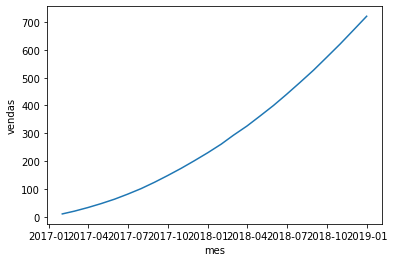

In [20]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [37]:
def plotar (titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

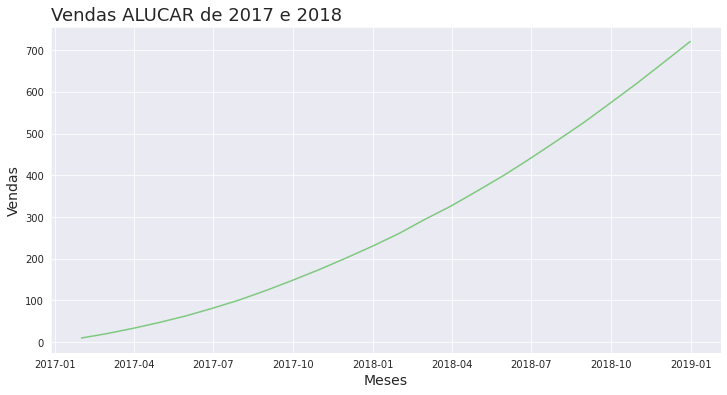

In [38]:
plotar('Vendas ALUCAR de 2017 e 2018', 'Meses', 'Vendas', 'mes', 'vendas', alucar)

In [34]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head

<bound method NDFrame.head of           mes  vendas  aumento
0  2017-01-31      10      NaN
1  2017-02-28      20     10.0
2  2017-03-31      33     13.0
3  2017-04-30      47     14.0
4  2017-05-31      63     16.0
5  2017-06-30      81     18.0
6  2017-07-31     101     20.0
7  2017-08-31     124     23.0
8  2017-09-30     148     24.0
9  2017-10-31     174     26.0
10 2017-11-30     201     27.0
11 2017-12-31     230     29.0
12 2018-01-31     261     31.0
13 2018-02-28     293     32.0
14 2018-03-31     326     33.0
15 2018-04-30     362     36.0
16 2018-05-31     400     38.0
17 2018-06-30     440     40.0
18 2018-07-31     483     43.0
19 2018-08-31     527     44.0
20 2018-09-30     573     46.0
21 2018-10-31     621     48.0
22 2018-11-30     670     49.0
23 2018-12-31     721     51.0>

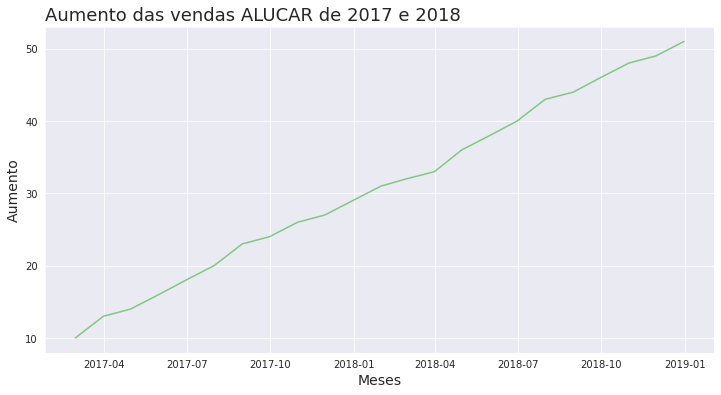

In [39]:
plotar('Aumento das vendas ALUCAR de 2017 e 2018', 'Meses', 'Aumento', 'mes', 'aumento', alucar)

In [41]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleração,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,10.0,NaN,NaN
2,2017-03-31,33,13.0,3.0,3.0
3,2017-04-30,47,14.0,1.0,1.0
4,2017-05-31,63,16.0,2.0,2.0


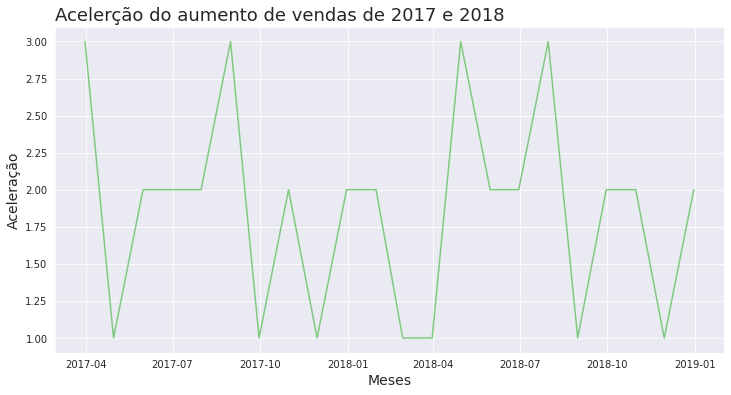

In [43]:
plotar('Acelerção do aumento de vendas de 2017 e 2018', 'Meses', 'Aceleração', 'mes', 'aceleracao', alucar)

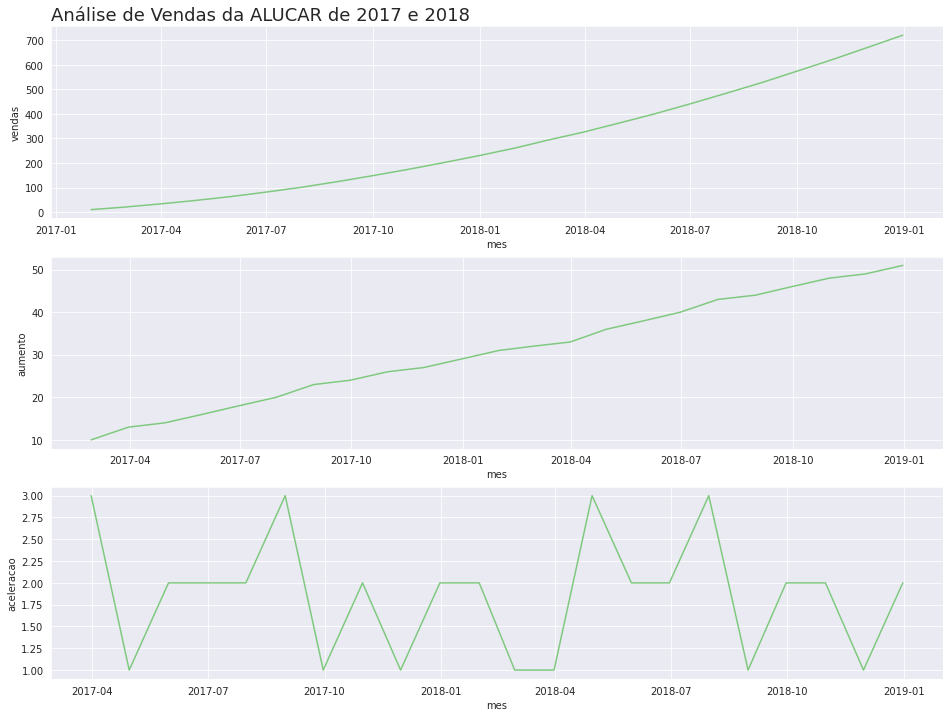

In [46]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da ALUCAR de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax


In [48]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax=ax

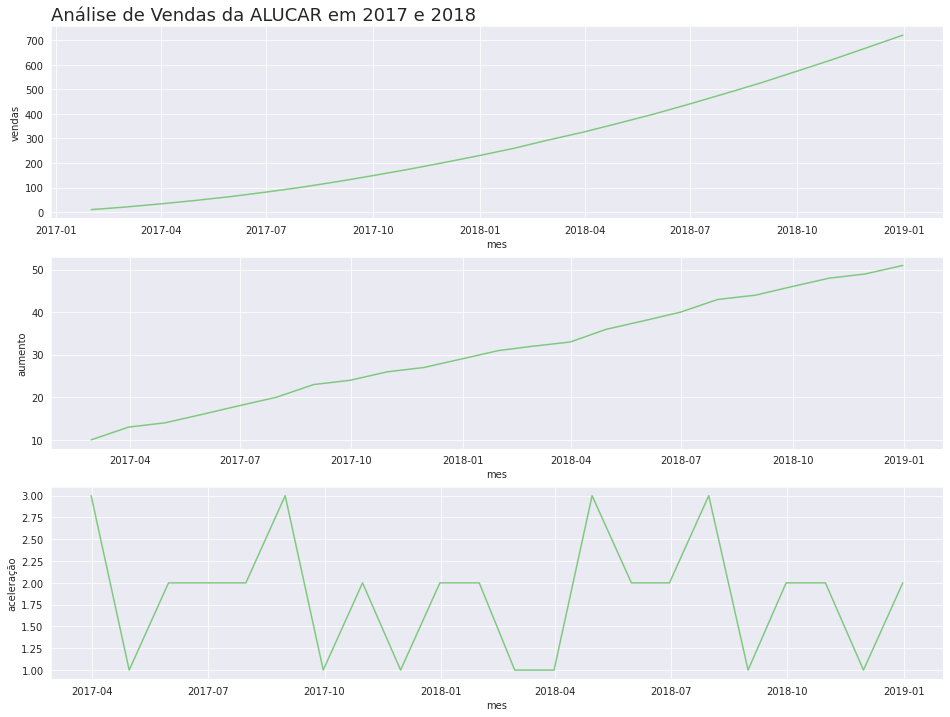

In [49]:
plot_comparacao('mes','vendas','aumento','aceleração', alucar, 'Análise de Vendas da ALUCAR em 2017 e 2018')

In [50]:
from pandas.plotting import autocorrelation_plot

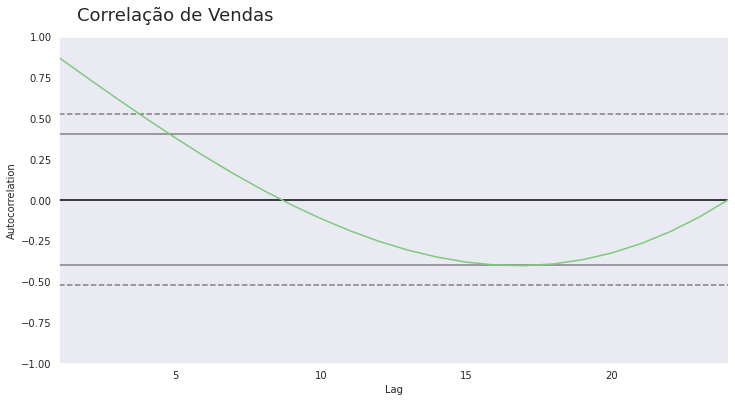

In [55]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)

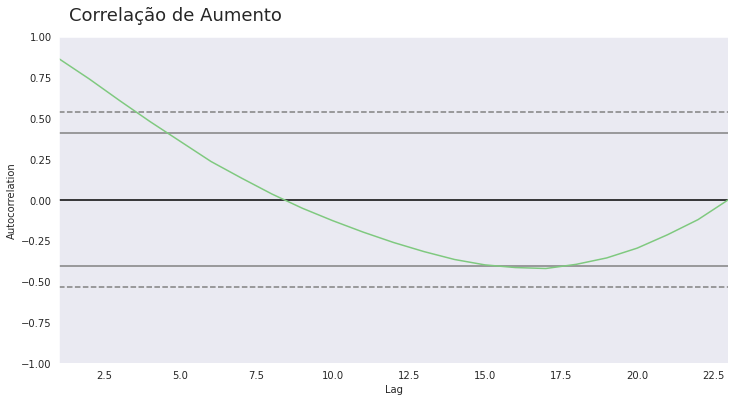

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:])

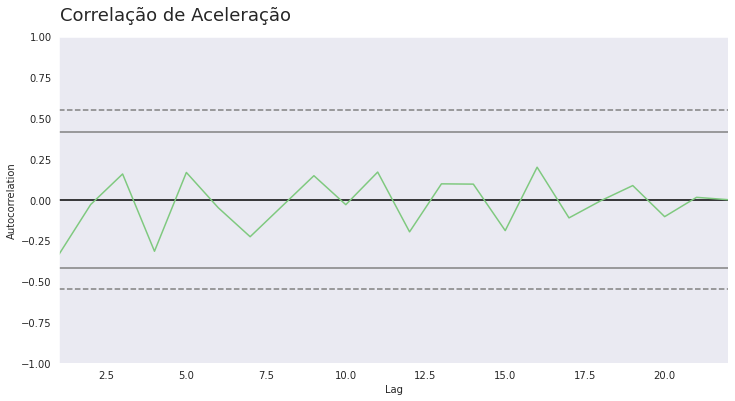

In [58]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])